<a href="https://colab.research.google.com/github/raphaelgoncalves/UNICAMP-DataSci4Health-Projeto-Final/blob/main/Modelo_Preditivo_ARIMA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Modelo preditivo ARIMA

#### Neste documento, realizaremos a modelagem predititiva com ARIMA para realizar uma comparação entre uma predição do ano de 2020, baseada em dados de 5 anos de internaçoes de influenza do SUS e o valores reais de 2020.

## Importação das Bibliotecas

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats 
import seaborn as sns
import datetime as dt
from statsmodels.tsa.seasonal import seasonal_decompose

## DATASUS - Importação, Pré-Processamento e Visualização dos dados.

### Internações por Influenza no SUS entre 2015 e 2020 na faixa etária de 0 a 4 anos

In [ ]:
internacao = 'https://raw.githubusercontent.com/raphaelgoncalves/UNICAMP-DataSci4Health-Projeto-Final/main/Data/interim/teste_6_datas.csv'

df = pd.read_csv(internacao)
df


,data,faixa0a4
0,2015-01,351
1,2015-02,332
2,2015-03,751
3,2015-04,800
4,2015-05,746
...,...,...
67,2020-08,194
68,2020-09,143
69,2020-10,132
70,2020-11,171


### Entendendo os tipos de dados do dataset

In [ ]:
df.dtypes

data        object
faixa0a4     int64
dtype: object

###Conversões de data

In [ ]:
df.data = pd.to_datetime(df.data)

df

,data,faixa0a4
0,2015-01-01,351
1,2015-02-01,332
2,2015-03-01,751
3,2015-04-01,800
4,2015-05-01,746
...,...,...
67,2020-08-01,194
68,2020-09-01,143
69,2020-10-01,132
70,2020-11-01,171


### Gráfico da Série Temporal

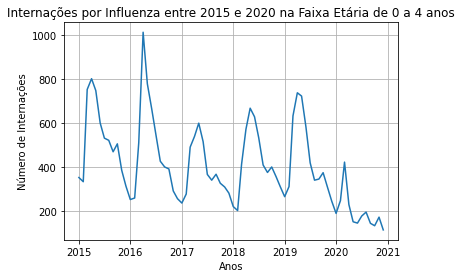

In [ ]:
plt.plot_date(df.data,df.faixa0a4, fmt='-')
plt.xlabel("Anos")
plt.ylabel("Número de Internações")
plt.title("Internações por Influenza entre 2015 e 2020 na Faixa Etária de 0 a 4 anos")
plt.grid()
plt.show()

## Modelo Preditivo ARIMA

###Preparação dos dados de index

In [ ]:

df.index = df.data
df = df.drop(columns=['data'])

### Instalação da Biblioteca Statsmodels

In [ ]:

!pip install statsmodels

### Separação do dataset em 2015-2019 e 2020.
Tal separação é necessária para usar somente os dados de 2015 a 2019 para serem usados de base para a predição.

In [ ]:

dfa = df.loc['2015-01-01':'2019-12-01',:]

df2020 = df.loc['2020-01-01':'2020-12-01',:]

### Configuração do Modelo ARIMA

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


                              ARMA Model Results                              
Dep. Variable:               faixa0a4   No. Observations:                   60
Model:                    ARMA(12, 0)   Log Likelihood                -353.133
Method:                       css-mle   S.D. of innovations             82.896
Date:                Tue, 15 Jun 2021   AIC                            734.266
Time:                        20:31:02   BIC                            763.587
Sample:                    01-01-2015   HQIC                           745.735
                         - 12-01-2019                                         
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
const             462.6702     36.745     12.591      0.000     390.651     534.690
ar.L1.faixa0a4      0.6724      0.133      5.038      0.000       0.411       0.934
ar.L2.faixa0a4     -0.1437      

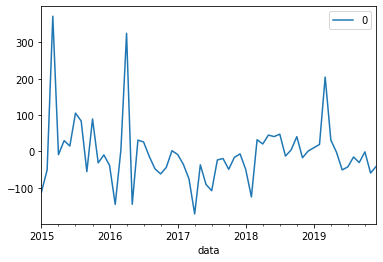

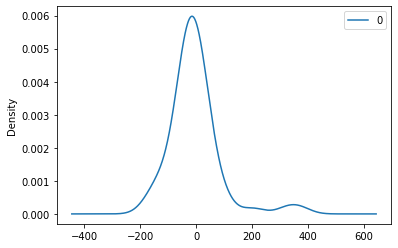

                0
count   60.000000
mean    -4.686768
std     90.824829
min   -172.100223
25%    -48.180679
50%    -13.404612
75%     21.783842
max    372.020750


In [ ]:
# fit an ARIMA model and plot residual errors
from pandas import datetime
from pandas import read_csv
from pandas import DataFrame
from statsmodels.tsa.arima_model import ARIMA
from matplotlib import pyplot
# fit model
model = ARIMA(dfa, order=(12,0,0))
model_fit = model.fit()
# summary of fit model
print(model_fit.summary())
# line plot of residuals
residuals = DataFrame(model_fit.resid)
residuals.plot()
pyplot.show()
# density plot of residuals
residuals.plot(kind='kde')
pyplot.show()
# summary stats of residuals
print(residuals.describe())

### Execução da Predição

In [ ]:
model_fit.predict(end=72)

2015-01-01    462.670221
2015-02-01    383.196525
2015-03-01    378.979250
2015-04-01    808.996147
2015-05-01    716.360003
                 ...    
2020-09-01    365.060287
2020-10-01    366.550637
2020-11-01    332.149532
2020-12-01    286.199172
2021-01-01    296.764695
Freq: MS, Length: 73, dtype: float64

### Exibição do Gráfico com os dados previstos e com os dados reais.

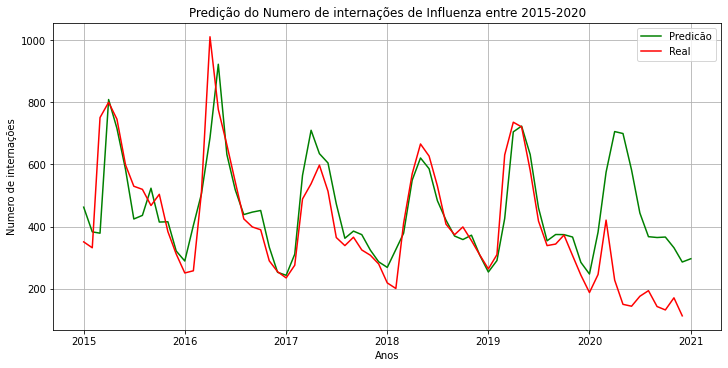

In [ ]:
fig, axs = plt.subplots(1, figsize=(10, 5), constrained_layout=True)

axs.plot(model_fit.predict(end=72),c='g', label='Predicão')
axs.plot(df,c='r',label='Real')

axs.set_title('Predição do Numero de internações de Influenza entre 2015-2020')
axs.set_ylabel('Numero de internações')
axs.set_xlabel('Anos')
axs.legend()

axs.grid()

## Conclusões
Esta versão do modelo preditivo mostrou que com base no comportamento da série nos ultimos 5 anos, caso não houvesse interferência de uma ou mais variáveis, seu comportamento seguiria um padrão de tendência e sazonalidade.

O modelo previsto pode ser melhorado em trabalhos futuros, porém, pode-se perceber e comprovar que houve, em algum momento em 2020, a interferência de uma ou mais variáveis para que o numero de internações apresenta-se os resultados de série temporal interrompida. 

<p align="justify">   </p>

